# Typen von Personen

Diese Datei enthält die Auswertungen der Typen Tabelle. 
Die Typen sind hierbei aggressiv, defensiv und normal.

1. Laden der Typen
2. Speichern der Typen für jeden Prozesstypen in einem Dictionary
3. Berechnung des Mittelwerts der Anteile der Typen für jeden Prozessteile an jeder Tür
5. Plotten der Anteile in Kuchendiagrammen für jeden Prozesstypen

## Biblitheken

In [5]:
import pandas as pd

import matplotlib.pyplot as plt

## Stildefinitonen der Plots

In [6]:
plt.style.use('ba')

## Helferfunktionen

In [28]:
def load_data(path):
    return pd.DataFrame(pd.read_csv(path+file_suffix, sep=";"))

def get_types_for_ptype(data, type_, ptype):
    return data[ptype+" "+type_]

def plot_proportions(dic_props, type_title):
    plt.figure(figsize=(12, 12))
    plt.grid(False)
    labels = 'Normal', 'Defensiv', 'Aggressiv'
    props = [dic_props['normal'], dic_props['defensive'], dic_props['aggressive']]
    plt.pie(props, labels=labels, autopct='%1.2f%%', startangle=90, textprops=dict(color="w"))
    plt.legend(title='Anteile Typen', bbox_to_anchor=(0.8, 0, 0.5, 1))
    plt.axis('equal')
    plt.title(type_title, fontsize=36)
    plt.savefig('..\\Text\\pictures\\data_evaluation\\types\\proportions_'+type_title+'.png', bbox_inches='tight')

## Laden der Daten

In [29]:
path = "Tabels/PeopleTypes"
file_suffix = ".csv"

In [30]:
data_types = load_data(path)
#data_types

## Datenvorverarbeitung: Erstellung eines Dictionarys für Typen

In [31]:
types = ['defensive', 'aggressive', 'normal']
ptypes = ['boarding', 'alight', 'spacemaker']

In [32]:
dic_types_for_ptype = {'boarding': {}, 'alight': {}, 'spacemaker': {}}
for ptype in ptypes:
    for type_ in types:
        amount = get_types_for_ptype(data_types, type_, ptype)
        dic_types_for_ptype[ptype][type_] = get_types_for_ptype(data_types, type_, ptype)

## Berechnung der Anteile

In [33]:
# Anteile werden aus dem Mittelwert der Anteile pro Tür berechnet, da Typen sich gegenseitig bedingen

dic_prop = {'boarding': {}, 'alight': {}, 'spacemaker': {}}
for ptype in dic_types_for_ptype:
    all_persons_for_this_ptype = sum(dic_types_for_ptype[ptype].values())
    for type_ in dic_types_for_ptype[ptype]:
        dic_prop[ptype][type_] = sum(dic_types_for_ptype[ptype][type_])/sum(all_persons_for_this_ptype)

#print(dic_types_prop_for_ptype)

## Kuchendiagramme für Anteile der Typen für die Prozesstypen

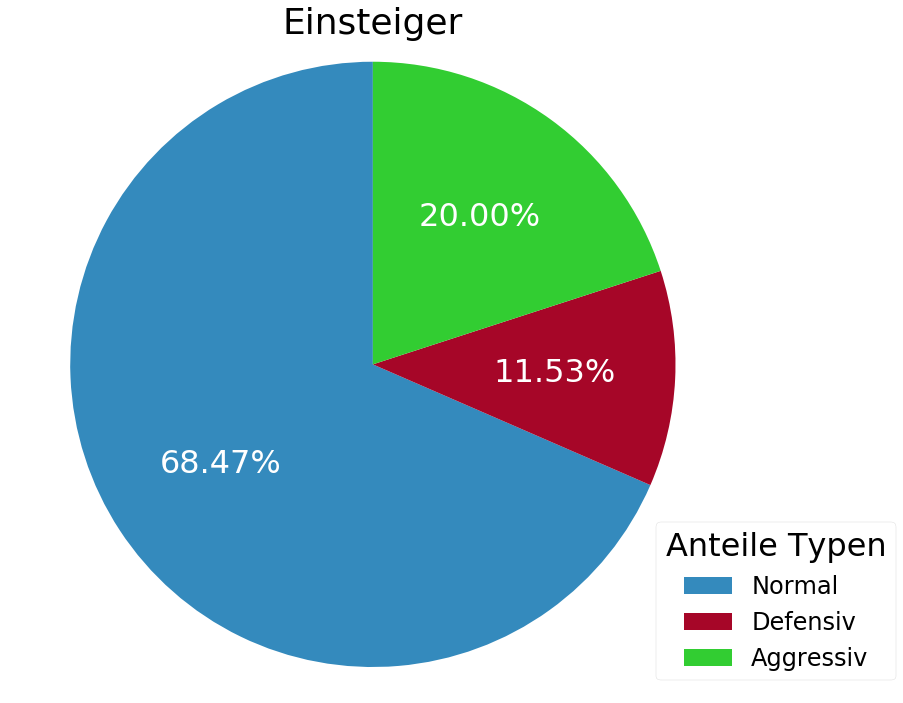

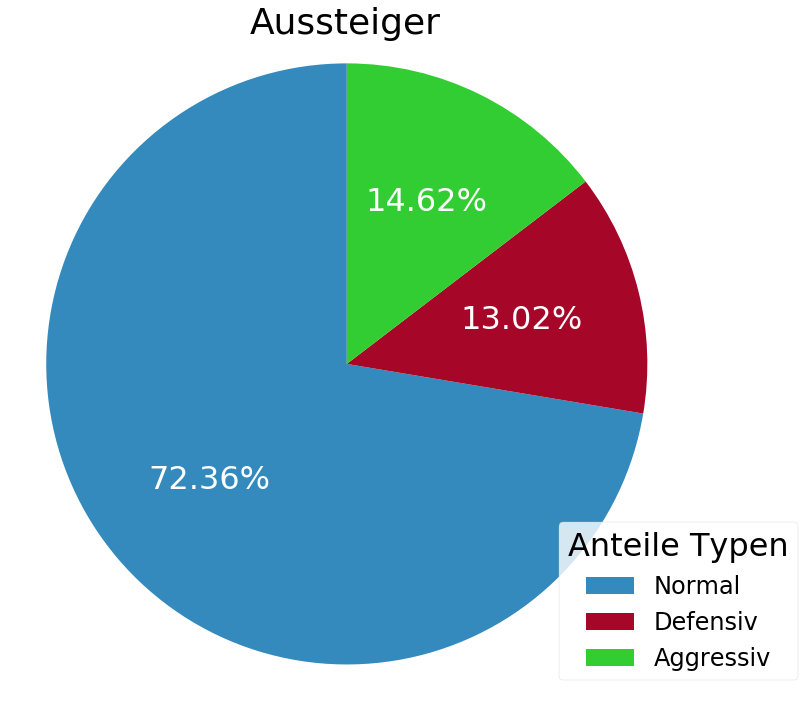

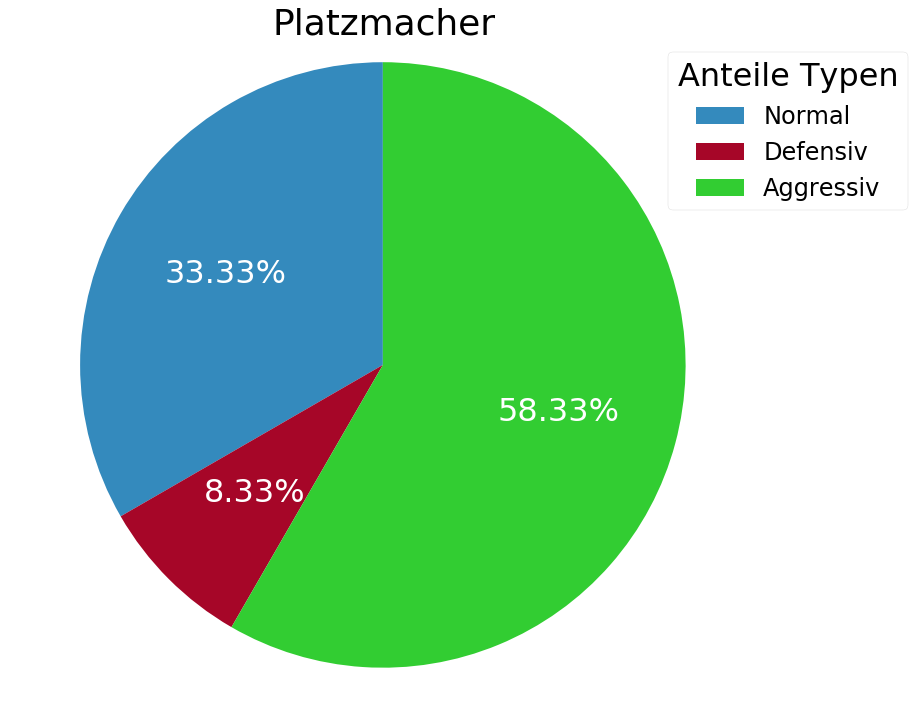

In [34]:
plot_proportions(dic_prop['boarding'], "Einsteiger")
plot_proportions(dic_prop['alight'], "Aussteiger")
plot_proportions(dic_prop['spacemaker'], "Platzmacher")